In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split

from scipy import signal
from scipy.io import wavfile

In [3]:
file = "D:\Work\VIT\Capstone Project\Dataset\Marvin\marvin (16).wav"

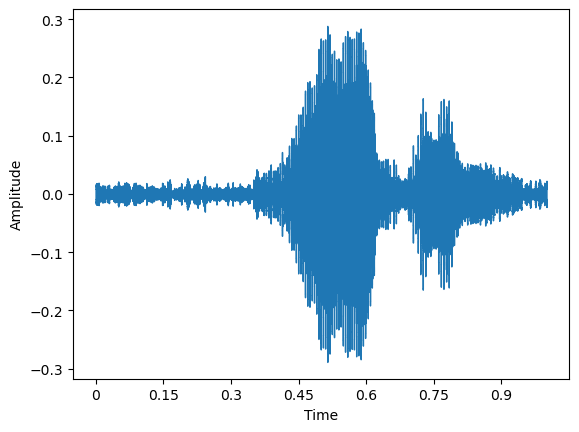

In [4]:
#Waveform Visualization
signal, sr = librosa.load(file, sr = 22050) #sr = sampling rate, signal = 1D numpy array
librosa.display.waveshow(signal, sr = 22050)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [5]:
#FFT Spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft) #Contains the values of each frequency
#Magnitude Spectrum - Indicates the contribution of each individual frequency in the spectrum
#We map each frequency magnitude value to its relative frequency values on x axis
frequency = np.linspace(0, sr, len(magnitude))
#We only focus on the first half of the symmetrical spectrum to obtain useful information
leftMagnitude = magnitude[:int(len(magnitude)/2)]
leftFrequency = frequency[:int(len(frequency)/2)]

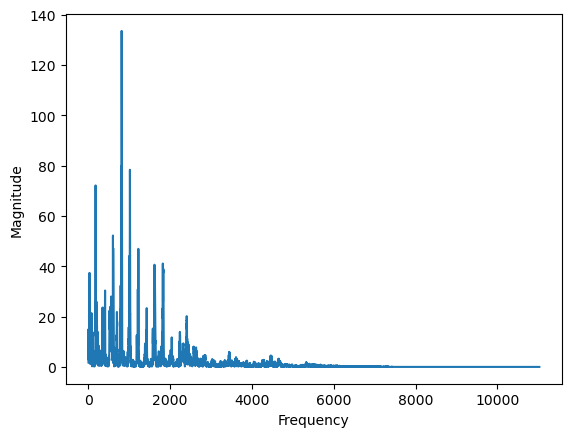

In [6]:
#Plotting frequency & magnitude - Power Spectrum
plt.plot(leftFrequency, leftMagnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()
#Most of the energy are focussed on the lower frequencies.

In [7]:
#Spectrogram
#Power spectrum is static
#Spectrogram denotes the contribution of various frequencies over time, as a sequence

nFFT = 2048 #Number of samples per FFT
hopLength = 512 #By how much we shift the values to the right after each FFT

stft = librosa.core.stft(signal, hop_length = hopLength, n_fft = nFFT)
spectrogram = np.abs(stft)
logSpectrogram = librosa.amplitude_to_db(spectrogram)

In [8]:
logSpectrogram.shape

(1025, 44)

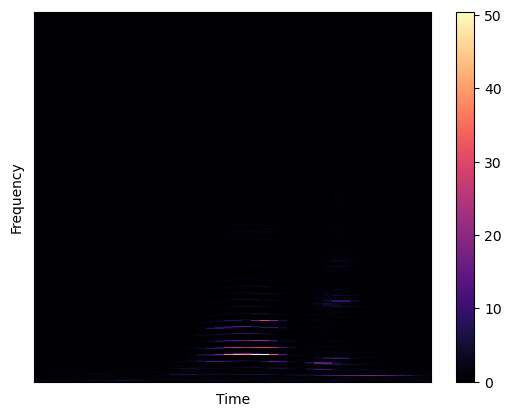

In [9]:
librosa.display.specshow(spectrogram, sr=sr, hop_length = hopLength)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

#Here we can see that very few frequencies contribute to the signal - Normal Spectrogram

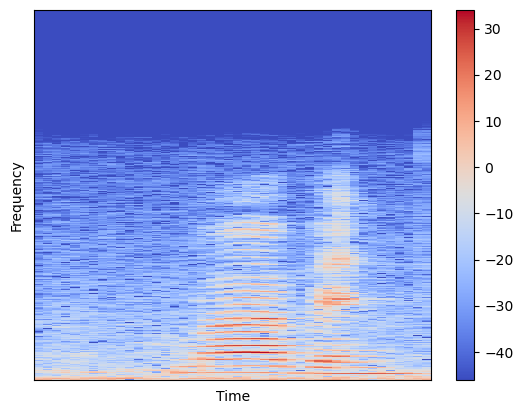

In [10]:
librosa.display.specshow(logSpectrogram, sr=sr, hop_length = hopLength)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

#Blue - low intensity, Red - high intensity

C:\Users\91805\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[-0.00605343 -0.00747427 -0.00850128 ...  0.02102339  0.02233407
  0.0133286 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


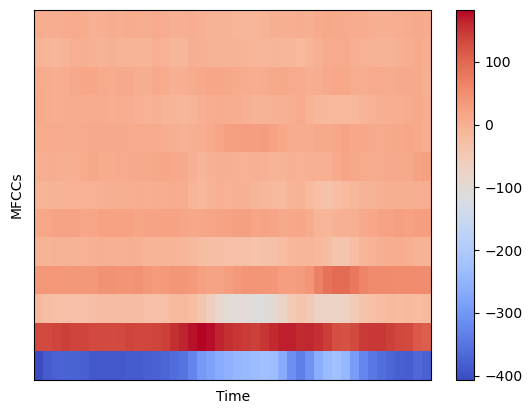

In [12]:
# 13 MFCCs
#n_mfcc = 13 - Commonly used number
MFCCs = librosa.feature.mfcc(signal, n_fft = nFFT, hop_length = hopLength, n_mfcc = 13)

librosa.display.specshow(MFCCs, sr=sr, hop_length = hopLength)
plt.xlabel("Time")
plt.ylabel("MFCCs")
plt.colorbar()
plt.show()

C:\Users\91805\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[-0.00605343 -0.00747427 -0.00850128 ...  0.02102339  0.02233407
  0.0133286 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


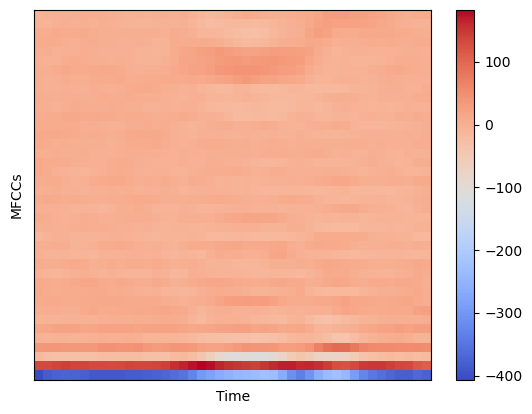

In [13]:
# 40 MFCCs
#n_mfcc = 13 - Commonly used number
MFCCs = librosa.feature.mfcc(signal, n_fft = nFFT, hop_length = hopLength, n_mfcc = 40)

librosa.display.specshow(MFCCs, sr=sr, hop_length = hopLength)
plt.xlabel("Time")
plt.ylabel("MFCCs")
plt.colorbar()
plt.show()

In [24]:
print(MFCCs)

[[-4.06488342e+02 -3.83718964e+02 -3.78006561e+02 ... -3.82624176e+02
  -3.69130524e+02 -3.78389221e+02]
 [ 1.32478760e+02  1.33534103e+02  1.37531509e+02 ...  1.32789917e+02
   1.17847710e+02  1.09966774e+02]
 [-1.58976669e+01 -2.56805077e+01 -2.82624683e+01 ... -1.93776207e+01
  -2.18595886e+01 -1.98144150e+01]
 ...
 [ 5.14233685e+00  4.13495636e+00  7.78463078e+00 ...  5.67447519e+00
   3.77151847e+00  1.71270776e+00]
 [-4.39306116e+00 -7.22981358e+00  5.46655238e-01 ... -9.06942368e-01
  -1.90810752e+00 -3.80107164e+00]
 [-6.16903019e+00 -3.80481672e+00 -1.11134648e-01 ...  9.26433206e-01
   7.44896221e+00  9.52140045e+00]]


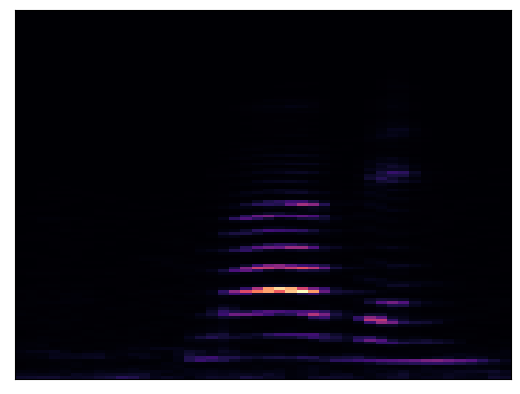

In [14]:
#Another way to plot Spectrogram
sgram_mag, _ = librosa.magphase(stft)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
librosa.display.specshow(mel_scale_sgram)

In [15]:
sgram_mag.shape

(1025, 44)

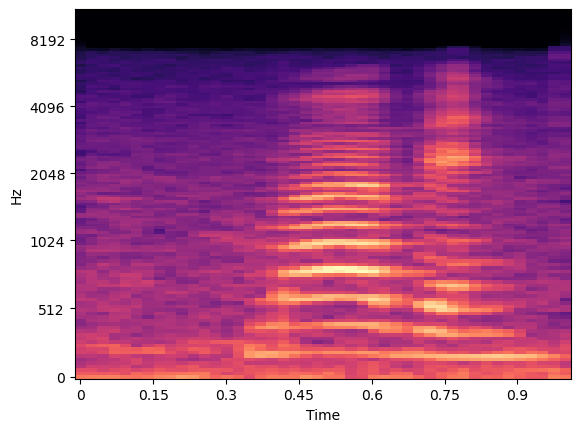

In [16]:
#Log Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')

In [18]:
print(MFCCs[0])

[-406.48834 -383.71896 -378.00656 -373.53372 -374.39572 -380.43542
 -388.98114 -388.98166 -388.49277 -388.4712  -383.50763 -384.2599
 -380.89594 -378.08676 -370.6633  -360.71527 -351.92062 -329.79913
 -296.07864 -283.8263  -267.91318 -252.5847  -243.80562 -240.17827
 -235.15504 -226.93428 -232.7707  -267.29706 -313.47498 -336.79385
 -307.65015 -262.4122  -237.63535 -225.76906 -241.1866  -291.5231
 -328.1237  -345.33704 -358.90054 -371.23624 -379.96252 -382.62418
 -369.13052 -378.38922]


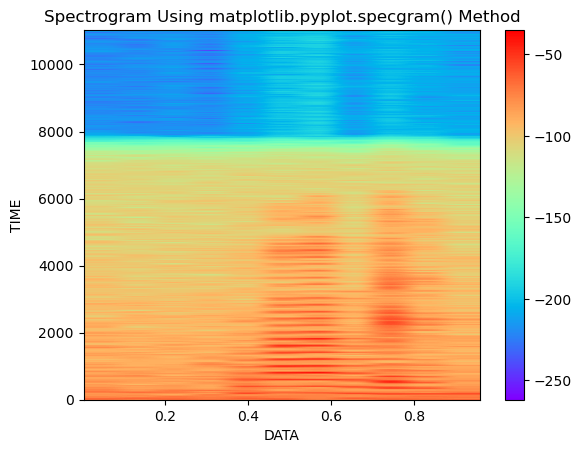

In [19]:
plt.specgram(signal, NFFT = 2048, Fs=22050, cmap="rainbow")
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("DATA")
plt.ylabel("TIME")
plt.colorbar()
plt.show()

In [20]:
hl = 512 # number of samples per time-step in spectrogram
hi = 128 # Height of image
wi = 384 # Width of image

In [21]:
window = signal[0:wi*hl]

C:\Users\91805\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.00605343 -0.00747427 -0.00850128 ...  0.02102339  0.02233407
  0.0133286 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


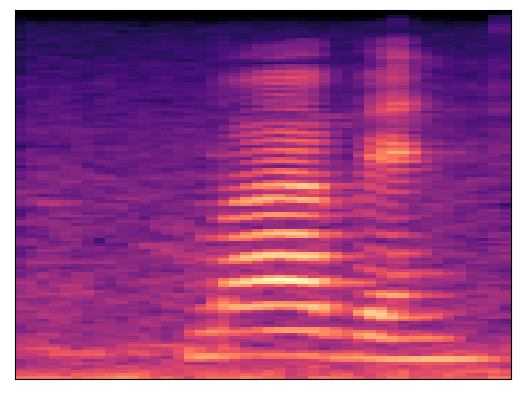

In [22]:
S = librosa.feature.melspectrogram(window, sr=22050, n_mels=hi, fmax=8000, hop_length=hopLength)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, sr=22050, fmax=8000)
plt.savefig("D:/Work/VIT/Capstone Project/Mel Spect Images/out.png")

In [95]:
# GFCCs
import scipy.io.wavfile
import spafe
from spafe.features.gfcc import gfcc
from spafe.features.pncc import pncc

sr = 22050
sr, sig = scipy.io.wavfile.read(file)
gfccs  = gfcc(sig, fs = sr, num_ceps=13)
print(gfccs)

[[ 1.00189275e+02 -3.84782187e+01 -8.23262666e+00  9.30485584e+00
  -3.64130475e+00  2.45902576e+00  7.36031462e-01  8.37126832e-01
   2.25982017e+00  5.57473199e+00 -3.12718301e-01 -8.54532229e+00
  -3.29627553e+00]
 [ 9.71918016e+01 -3.96069049e+01 -1.01441376e+00  6.24810530e+00
  -5.55586413e+00  6.62580868e+00  7.70929155e-01  3.53766810e+00
   1.22494466e+00  1.08096722e+00 -4.99066709e+00 -4.27248368e+00
  -2.10665007e+00]
 [ 1.05113212e+02 -3.71262023e+01 -7.37415450e+00  1.30846772e+01
  -1.61861824e+00  1.74648470e+00  4.06338634e+00  4.98025704e+00
   3.94469965e+00  8.71356231e+00 -5.99061759e-01 -5.97533219e+00
  -1.19414246e+00]
 [ 1.11833885e+02 -3.93200432e+01 -1.64469886e+01  1.58580719e+01
  -5.29466518e+00  5.61100939e-01  1.01889440e+01  3.84800659e+00
  -5.04028462e+00  5.30169798e+00 -9.65772504e-01 -1.05230196e+01
  -1.89787658e+00]
 [ 1.06965621e+02 -3.61925159e+01 -1.02507645e+01  8.18569108e+00
  -9.24538445e+00 -5.94593341e+00 -3.52328071e-01  8.06474434e+00


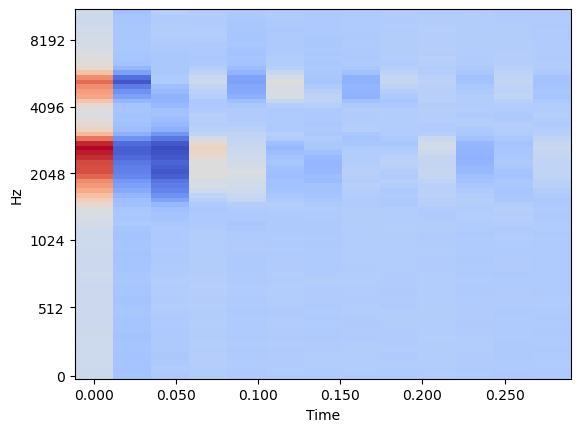

In [96]:
librosa.display.specshow(gfccs, sr=sr, hop_length = hopLength, x_axis='time', y_axis='mel')

In [44]:
#BFCCs
from spafe.features.bfcc import bfcc
fs = 22050
#read wave file
fs, sig = scipy.io.wavfile.read(file)

# compute bfccs
bfccs  = bfcc(sig, fs = sr, num_ceps=13)
print(bfccs)

[[-7.61165563e+01 -1.64220267e+00 -2.56908071e+00 ... -7.12502298e-01
   1.69902594e-01 -5.56362721e-01]
 [-7.61440940e+01 -1.99933438e+00 -2.48790729e+00 ... -1.11118860e+00
   6.49245046e-01 -4.46257712e-01]
 [-7.64715427e+01 -2.22056400e+00 -2.57682427e+00 ... -9.30872624e-01
   8.57120555e-01 -7.72724898e-02]
 ...
 [-7.60163704e+01 -4.24306320e-01 -1.19995824e+00 ... -1.89499476e+00
  -4.06241463e-01 -1.03557983e+00]
 [-7.63304952e+01 -1.61935696e+00 -1.80642794e+00 ... -2.47450864e+00
  -7.06439130e-01 -1.41560338e+00]
 [-7.78675349e+01  5.77266409e-01 -1.30902248e+00 ... -3.13253453e-01
  -7.11077267e-01  5.05427320e-02]]


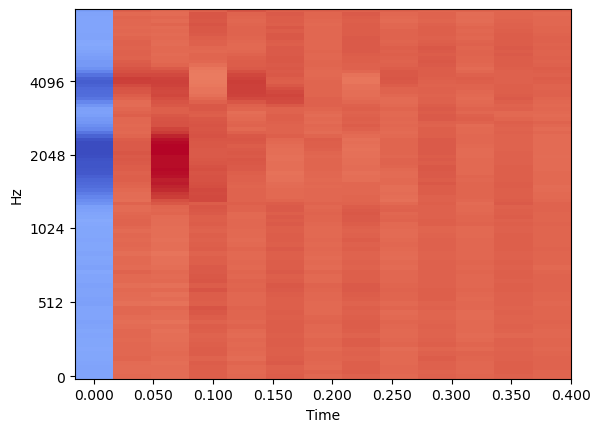

In [42]:
librosa.display.specshow(bfccs, sr=sr, hop_length = hopLength, x_axis='time', y_axis='mel')

In [52]:
#LFCCs
from spafe.features.lfcc import lfcc
fs = 22050
#read wave file
fs, sig = scipy.io.wavfile.read(file)

# compute bfccs
lfccs  = lfcc(sig, fs = fs, num_ceps=13)
print(lfccs)

[[ 4.26847863e+01  5.37473492e+00 -2.60549056e+00 ... -2.62489988e-01
   1.26230810e+00 -1.66984347e-01]
 [ 4.17441332e+01  4.57516030e+00 -2.26066773e+00 ... -1.34264513e+00
   9.49306293e-02 -3.89369334e-01]
 [ 4.25908469e+01  4.25504397e+00 -3.14518295e+00 ...  5.89548124e-02
   4.61425506e-01 -1.85687025e-01]
 ...
 [ 4.21592486e+01  5.15637819e+00 -3.55730295e+00 ... -5.14338359e-01
   4.70513272e-01 -1.91001846e-01]
 [ 4.21785364e+01  4.67948813e+00 -3.08855124e+00 ... -1.03585405e-02
   1.29381357e-01 -3.34118739e-01]
 [ 4.93289268e+01 -6.17861674e-01 -2.01463380e+00 ... -7.70472224e-01
  -2.52122551e-01  3.02757746e-01]]


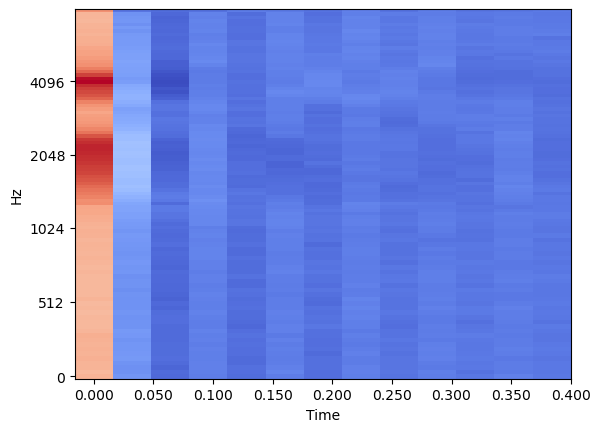

In [53]:
librosa.display.specshow(lfccs, sr=sr, hop_length = hopLength, x_axis='time', y_axis='mel')

In [75]:
import scipy
from spafe.utils import vis
from spafe.features.pncc import pncc
import scipy.io.wavfile as wav
# read wav
(fs, sig) = wav.read(file)
pnccs = pncc(sig=sig, fs=fs, num_ceps=13, low_freq = 0, high_freq = 2000)
print(pnccs)


[[ 1.53481975e+01 -1.22396676e+00  3.37374831e-01 ... -1.54530340e-01
  -5.16779548e-02  1.63476404e-02]
 [ 7.49727047e+00 -4.63310990e-01  7.62311127e-02 ... -5.89767902e-02
   3.30749956e-02  6.14914959e-02]
 [ 7.15060670e+00 -4.59781584e-01  3.51572992e-02 ...  5.81909363e-03
   1.94301998e-03 -8.16865408e-02]
 ...
 [ 3.05914413e+00  6.61742542e-01 -8.39027018e-02 ... -8.39586051e-03
  -2.05915349e-02 -3.29130352e-02]
 [ 2.98920651e+00  6.10267126e-01 -5.09387863e-02 ... -2.84884240e-02
  -5.72686168e-02 -1.09158674e-02]
 [ 3.02306807e+00  7.05041990e-01  1.29501083e-02 ... -2.30385980e-02
  -5.87776612e-02 -2.38061644e-02]]


In [76]:
import scipy
from spafe.utils import vis
from spafe.features.mfcc import mfcc
import scipy.io.wavfile as wav
# read wav
(fs, sig) = wav.read(file)
mfccs = mfcc(sig=sig, fs=fs, num_ceps=13, low_freq = 0, high_freq = 2000)
print(mfccs)

[[44.305484    1.1721999  -3.01484178 ... -0.76657951  0.94438852
  -0.08790996]
 [43.25261896  0.56433234 -1.91544418 ...  0.16182791  0.77173313
   0.13204559]
 [43.64673086  0.07031684 -2.71018003 ... -1.11705411  0.64859444
  -0.60713974]
 ...
 [43.85097572  1.02715945 -2.3094959  ... -0.30348516  0.7783437
   0.19601999]
 [43.4800199   0.52584755 -2.54262927 ... -0.27352146  0.77890396
   0.37151259]
 [48.49951804 -4.02753022 -1.70115783 ...  0.26412901  0.23772169
  -0.24397153]]


In [83]:
print(len(mfccs.T), len(mfccs))

13 98


In [84]:
print(len(gfccs.T), len(gfccs))

13 98


In [85]:
print(len(lfccs.T), len(lfccs))

13 98


In [86]:
print(len(pnccs.T), len(pnccs))

13 98
